# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.metrics import mean_absolute_error

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
from sklearn.metrics import make_scorer

In [12]:
from sklearn.metrics import r2_score

In [13]:
import seaborn as sns

In [14]:
#import warnings
#warnings.filterwarnings('ignore')

In [15]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv') # обучающая выборка

In [16]:
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv') # тестовая выборка

In [17]:
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv') # исходные данные

In [18]:
gold_recovery_train.head(40)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [19]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

В тренировочном датасете видим неверный тип данных для даты, а также пропущенные значения. Меняем тип и заполняем пропуски их предыдущими значениями..

In [20]:
#gold_recovery_train = gold_recovery_train.fillna(method='pad')

In [21]:
#for column in gold_recovery_train.drop('date', axis=1):
    #gold_recovery_train[column] = gold_recovery_train[column].fillna(gold_recovery_train[column].median())

In [22]:
gold_recovery_train = gold_recovery_train.dropna()

In [23]:
gold_recovery_train['date'] = pd.to_datetime(gold_recovery_train['date'], format='%Y.%m.%d %H:%M:%S')

In [24]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  11017 non-null datetime64[ns]
final.output.concentrate_ag                           11017 non-null float64
final.output.concentrate_pb                           11017 non-null float64
final.output.concentrate_sol                          11017 non-null float64
final.output.concentrate_au                           11017 non-null float64
final.output.recovery                                 11017 non-null float64
final.output.tail_ag                                  11017 non-null float64
final.output.tail_pb                                  11017 non-null float64
final.output.tail_sol                                 11017 non-null float64
final.output.tail_au                                  11017 non-null float64
primary_cleaner.input.sulfate                         11017 non-null float64
primary_cleaner.input.depressant     

In [25]:
print(gold_recovery_train.duplicated().sum(), gold_recovery_train['date'].duplicated().sum())
# проверим полные дупликаты и на данные на одно время

0 0


Определяем, верно ли расчитана эффективность обогащения.Для этого расчитаваем её на обучающей выборке для признака rougher.output.recovery и ищем MAE между расчётами и значением признака.

In [26]:
gold_recovery_train_au = gold_recovery_train.loc[:,['date', 'rougher.output.concentrate_au',  'rougher.output.tail_au', 'rougher.input.feed_au', 'rougher.output.recovery']]
# создаем таблицу с нужными нам столбцами

In [27]:
gold_recovery_train_au.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 5 columns):
date                             11017 non-null datetime64[ns]
rougher.output.concentrate_au    11017 non-null float64
rougher.output.tail_au           11017 non-null float64
rougher.input.feed_au            11017 non-null float64
rougher.output.recovery          11017 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 516.4 KB


In [28]:
gold_recovery_train_au.head(40)

,date,rougher.output.concentrate_au,rougher.output.tail_au,rougher.input.feed_au,rougher.output.recovery
0,2016-01-15 00:00:00,19.793808,1.170244,6.486150,87.107763
1,2016-01-15 01:00:00,20.050975,1.184827,6.478583,86.843261
2,2016-01-15 02:00:00,19.737170,1.162562,6.362222,86.842308
3,2016-01-15 03:00:00,19.320810,1.079755,6.118189,87.226430
4,2016-01-15 04:00:00,19.216101,1.012642,5.663707,86.688794
5,2016-01-15 05:00:00,18.950385,0.915835,5.687168,88.156912
6,2016-01-15 06:00:00,19.319591,0.986248,6.038436,88.168065
7,2016-01-15 07:00:00,19.507897,1.116110,6.433854,87.668336
8,2016-01-15 08:00:00,19.789465,1.186780,6.526612,87.035862
9,2016-01-15 09:00:00,19.497669,1.167140,6.633002,87.650868


In [29]:
gold_recovery_train_au['rougher.output.recovery_check'] = 100 * (gold_recovery_train_au['rougher.output.concentrate_au'] * (gold_recovery_train_au['rougher.input.feed_au'] - gold_recovery_train_au['rougher.output.tail_au'])) / gold_recovery_train_au['rougher.input.feed_au'] / (gold_recovery_train_au['rougher.output.concentrate_au'] - gold_recovery_train_au['rougher.output.tail_au'])

In [30]:
gold_recovery_train_au.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 6 columns):
date                             11017 non-null datetime64[ns]
rougher.output.concentrate_au    11017 non-null float64
rougher.output.tail_au           11017 non-null float64
rougher.input.feed_au            11017 non-null float64
rougher.output.recovery          11017 non-null float64
rougher.output.recovery_check    11017 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 602.5 KB


In [31]:
gold_recovery_train_au.tail()

,date,rougher.output.concentrate_au,rougher.output.tail_au,rougher.input.feed_au,rougher.output.recovery,rougher.output.recovery_check
16855,2018-08-18 06:59:59,18.603550,0.748633,5.335862,89.574376,89.574376
16856,2018-08-18 07:59:59,18.441436,0.771582,4.838619,87.724007,87.724007
16857,2018-08-18 08:59:59,15.111231,0.685059,4.525061,88.890579,88.890579
16858,2018-08-18 09:59:59,17.834772,0.567130,4.362781,89.858126,89.858126
16859,2018-08-18 10:59:59,17.804134,0.586439,4.365491,89.514960,89.514960


In [32]:
gold_recovery_train_au.describe()

,rougher.output.concentrate_au,rougher.output.tail_au,rougher.input.feed_au,rougher.output.recovery,rougher.output.recovery_check
count,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000
mean,19.776788,1.840316,8.107739,82.741888,82.741888
std,3.600455,0.645168,1.790876,13.590523,13.590523
min,0.000000,0.053283,0.010000,0.000000,-0.000000
25%,18.835324,1.440929,6.830117,79.997468,79.997468
50%,20.262237,1.815137,7.865763,84.847754,84.847754
75%,21.662943,2.223659,9.247575,89.635149,89.635149
max,28.146838,6.023451,13.126043,100.000000,100.000000


Видим, что при расчете по формуле в части ячеек нет значений. Очевидно, это ситуации, где доля золота в концентрате после флотации/очистки равна доле золота в отвальных хвостах после флотации (очистки.gold_recovery_train_au['rougher.output.concentrate_au'] = gold_recovery_train_au['rougher.output.tail_au']).
Это означает, что в этих ситуациях процесс обогащения золота не качественный, эти строки удалим. Также удалим строки с бесконечными значениями.

In [33]:
gold_recovery_train_au = gold_recovery_train_au.replace([np.inf, -np.inf], np.nan)

In [34]:
gold_recovery_train_au.dropna(subset =['rougher.output.recovery_check'], inplace=True)

In [35]:
gold_recovery_train_au.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 6 columns):
date                             11017 non-null datetime64[ns]
rougher.output.concentrate_au    11017 non-null float64
rougher.output.tail_au           11017 non-null float64
rougher.input.feed_au            11017 non-null float64
rougher.output.recovery          11017 non-null float64
rougher.output.recovery_check    11017 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 602.5 KB


In [36]:
gold_recovery_train_au.describe()

,rougher.output.concentrate_au,rougher.output.tail_au,rougher.input.feed_au,rougher.output.recovery,rougher.output.recovery_check
count,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000
mean,19.776788,1.840316,8.107739,82.741888,82.741888
std,3.600455,0.645168,1.790876,13.590523,13.590523
min,0.000000,0.053283,0.010000,0.000000,-0.000000
25%,18.835324,1.440929,6.830117,79.997468,79.997468
50%,20.262237,1.815137,7.865763,84.847754,84.847754
75%,21.662943,2.223659,9.247575,89.635149,89.635149
max,28.146838,6.023451,13.126043,100.000000,100.000000


In [37]:
gold_recovery_train_au.sort_values(by='rougher.output.recovery_check').head(20)

,date,rougher.output.concentrate_au,rougher.output.tail_au,rougher.input.feed_au,rougher.output.recovery,rougher.output.recovery_check
9244,2017-06-05 03:59:59,0.0,2.330840,7.772070,0.0,-0.0
8326,2017-04-27 21:59:59,0.0,1.847301,7.816623,0.0,-0.0
8325,2017-04-27 20:59:59,0.0,1.836489,7.964794,0.0,-0.0
8324,2017-04-27 19:59:59,0.0,1.897243,8.105267,0.0,-0.0
8323,2017-04-27 18:59:59,0.0,1.894840,8.271775,0.0,-0.0
8322,2017-04-27 17:59:59,0.0,1.785209,8.280156,0.0,-0.0
8321,2017-04-27 16:59:59,0.0,2.020626,7.977409,0.0,-0.0
8320,2017-04-27 15:59:59,0.0,2.146695,8.052155,0.0,-0.0
12262,2018-02-07 21:59:59,0.0,1.977565,11.892421,0.0,-0.0
10081,2017-07-10 00:59:59,0.0,1.273084,6.379064,0.0,-0.0


In [38]:
# MAE между нашими расчётами и значением признака
print(mean_absolute_error( gold_recovery_train_au['rougher.output.recovery_check'], gold_recovery_train_au['rougher.output.recovery']))

1.1339894763023461e-14


Сравним распределения для значениями признака и расчетами, а также посмотрим на медианы.

In [39]:
print(gold_recovery_train_au['rougher.output.recovery'].median())
print(gold_recovery_train_au['rougher.output.recovery_check'].median())

84.84775401793671
84.8477540179367


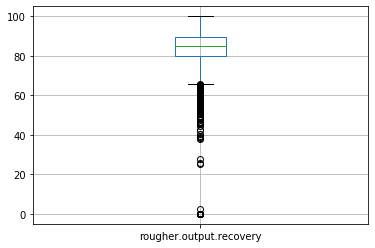

In [40]:
gold_recovery_train_au.boxplot('rougher.output.recovery')
plt.show()

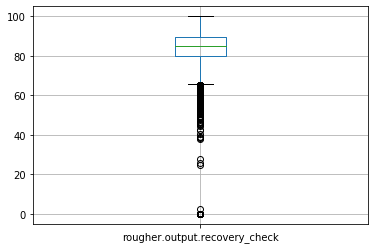

In [41]:
gold_recovery_train_au.boxplot('rougher.output.recovery_check')
plt.show()

MAE 1.1339894763023461e-14 при медианах 85.23599666059937 и 85.63380780007748 выглядит неплохо.

В распределения значительные расбросы. Посмотрим на значения больше 0, т.к. корректная эффективность должна быть больше 0.

In [42]:
gold_recovery_train_au = gold_recovery_train_au.loc[gold_recovery_train_au['rougher.output.recovery_check'] > 0]

In [43]:
print(mean_absolute_error( gold_recovery_train_au['rougher.output.recovery_check'], gold_recovery_train_au['rougher.output.recovery']))

1.1554903866465914e-14


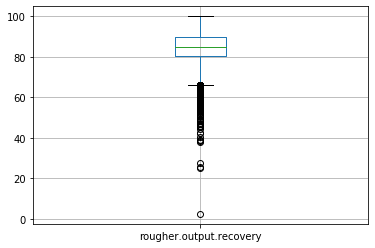

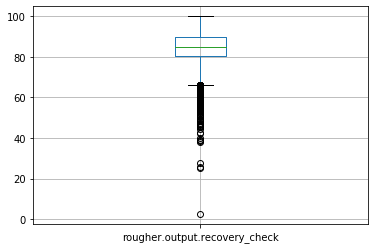

In [44]:
gold_recovery_train_au.boxplot('rougher.output.recovery')
plt.show()
gold_recovery_train_au.boxplot('rougher.output.recovery_check')
plt.show()

In [45]:
gold_recovery_train_au.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10812 entries, 0 to 16859
Data columns (total 6 columns):
date                             10812 non-null datetime64[ns]
rougher.output.concentrate_au    10812 non-null float64
rougher.output.tail_au           10812 non-null float64
rougher.input.feed_au            10812 non-null float64
rougher.output.recovery          10812 non-null float64
rougher.output.recovery_check    10812 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 591.3 KB


При положительных значениях распределения имеют схожий вид и MAE очень близкие.

In [46]:
gold_recovery_full.head(40)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [47]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [48]:
gold_recovery_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [49]:
gold_recovery_test.head(40)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [50]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

В полном и тестовом датасетах видим неверный тип данных для даты, а также пропущенные значения. Меняем тип заменяем пропуски их предыдущими значениями.

In [51]:
#gold_recovery_full = gold_recovery_full.fillna(method='pad')

In [52]:
#for column in gold_recovery_full.drop('date', axis=1):
    #gold_recovery_full[column] = gold_recovery_full[column].fillna(gold_recovery_full[column].median())

In [53]:
gold_recovery_full = gold_recovery_full.dropna()

In [54]:
gold_recovery_full['date'] = pd.to_datetime(gold_recovery_full['date'], format='%Y.%m.%d %H:%M:%S')

In [55]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16094 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  16094 non-null datetime64[ns]
final.output.concentrate_ag                           16094 non-null float64
final.output.concentrate_pb                           16094 non-null float64
final.output.concentrate_sol                          16094 non-null float64
final.output.concentrate_au                           16094 non-null float64
final.output.recovery                                 16094 non-null float64
final.output.tail_ag                                  16094 non-null float64
final.output.tail_pb                                  16094 non-null float64
final.output.tail_sol                                 16094 non-null float64
final.output.tail_au                                  16094 non-null float64
primary_cleaner.input.sulfate                         16094 non-null float64
primary_cleaner.input.depressant     

In [56]:
#gold_recovery_test = gold_recovery_test.fillna(method='pad')

In [57]:
#for column in gold_recovery_test.drop('date', axis=1):
    #gold_recovery_test[column] = gold_recovery_test[column].fillna(gold_recovery_test[column].median())

In [58]:
gold_recovery_test = gold_recovery_test.dropna()

In [59]:
gold_recovery_test['date'] = pd.to_datetime(gold_recovery_test['date'], format='%Y.%m.%d %H:%M:%S')

In [60]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5383 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5383 non-null datetime64[ns]
primary_cleaner.input.sulfate                 5383 non-null float64
primary_cleaner.input.depressant              5383 non-null float64
primary_cleaner.input.feed_size               5383 non-null float64
primary_cleaner.input.xanthate                5383 non-null float64
primary_cleaner.state.floatbank8_a_air        5383 non-null float64
primary_cleaner.state.floatbank8_a_level      5383 non-null float64
primary_cleaner.state.floatbank8_b_air        5383 non-null float64
primary_cleaner.state.floatbank8_b_level      5383 non-null float64
primary_cleaner.state.floatbank8_c_air        5383 non-null float64
primary_cleaner.state.floatbank8_c_level      5383 non-null float64
primary_cleaner.state.floatbank8_d_air        5383 non-null float64
primary_cleaner.state.floatbank8_d_level      5383 non-null float64
ro

In [61]:
# сравним тестовую и обучающую выборки
print(gold_recovery_train.drop(columns = gold_recovery_test.columns, axis = 1).columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

Видим, что есть параменты, недоступные в тестовой выборке. Это параметры:

- концентраций на разных стадиях в сырье
- концентрации на разных стадиях в отвальных хвостах
- эффективности на разных стадиях

Причина в том, что данные параметры получаются в процессе обогащения руды. От них зависит итоговая эффективность, которую нам нужно спрогнозировать.

# 2. Анализ данных

Смотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

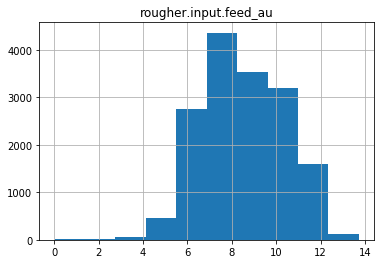

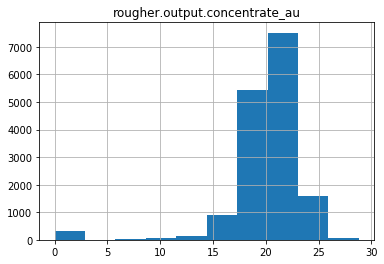

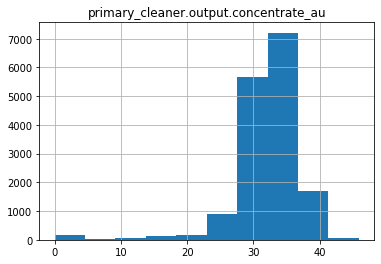

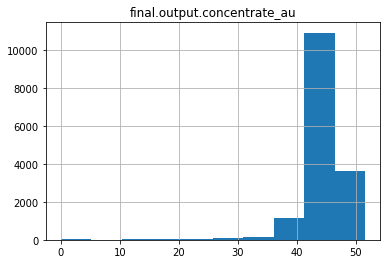

In [62]:
for column in gold_recovery_full[[ 'rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]: 
    gold_recovery_full[column].hist()
    plt.title(column)
    plt.show()

Из графиков видим растущее распределение концентрации для золота для каждого последующего этапа очистки:
    - rougher.input.feed_au 5-11
    - rougher.output.concentrate_au 17-23
    - primary_cleaner.output.concentrate_au 27-36
    - final.output.concentrate_au 44-48

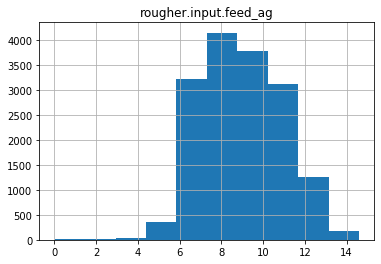

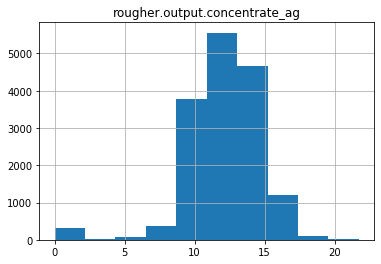

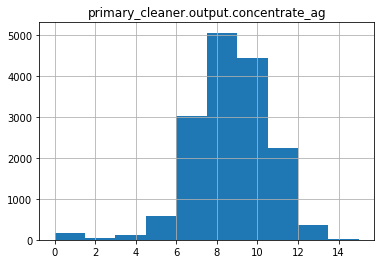

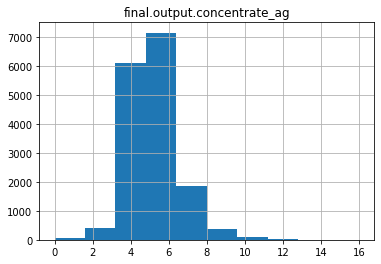

In [63]:
for column in gold_recovery_full[[ 'rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]: 
    gold_recovery_full[column].hist()
    plt.title(column)
    plt.show()

Из графиков видим возрастающие значения после флотации, далее уменьшающее на этапах очистки распределение концентрации для серебра:

- rougher.input.feed_au 6-12
- rougher.output.concentrate_au 10-15
- primary_cleaner.output.concentrate_au 6-11.5
- final.output.concentrate_au 3.5-6.2

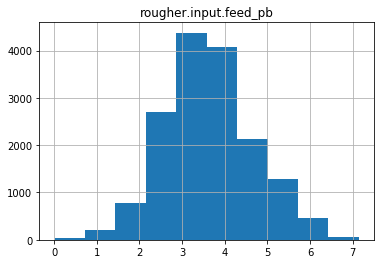

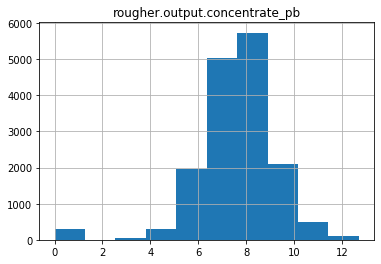

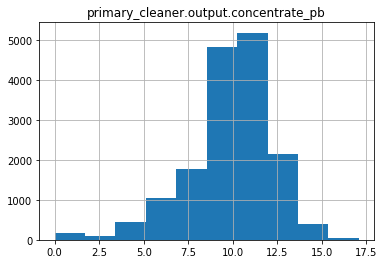

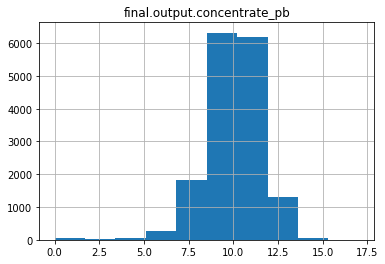

In [64]:
for column in gold_recovery_full[[ 'rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]: 
    gold_recovery_full[column].hist()
    plt.title(column)
    plt.show()

Из графиков для свинца видим возрастающие значения распределение концентрации для последующих стадий:

    -rougher.input.feed_au 2-5
    -rougher.output.concentrate_au 5.5-9
    -primary_cleaner.output.concentrate_au 8-12
    -final.output.concentrate_au 9-12

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. 

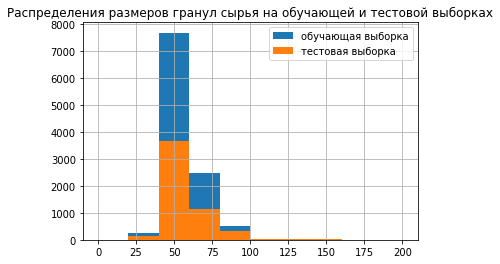

In [65]:
gold_recovery_train['rougher.input.feed_size'].hist(range=(0, 200), label = 'обучающая выборка')
gold_recovery_test['rougher.input.feed_size'].hist(range=(0, 200), label='тестовая выборка')
plt.title('Распределения размеров гранул сырья на обучающей и тестовой выборках')
plt.legend()
plt.show()

Распределения сходны, можно делать оценку с помощью модели.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [66]:
gold_recovery_full['total_rougher.output.concentrate'] = gold_recovery_full['rougher.output.concentrate_ag'] + gold_recovery_full['rougher.output.concentrate_pb'] + gold_recovery_full['rougher.output.concentrate_sol'] + gold_recovery_full['rougher.output.concentrate_au']
gold_recovery_full['total_primary_cleaner.output.concentrate'] = gold_recovery_full['primary_cleaner.output.concentrate_ag'] + gold_recovery_full['primary_cleaner.output.concentrate_pb'] + gold_recovery_full['primary_cleaner.output.concentrate_sol'] + gold_recovery_full['primary_cleaner.output.concentrate_au']
gold_recovery_full['total_final.output.concentrate'] = gold_recovery_full['final.output.concentrate_ag'] + gold_recovery_full['final.output.concentrate_pb'] + gold_recovery_full['final.output.concentrate_sol'] + gold_recovery_full['final.output.concentrate_au']

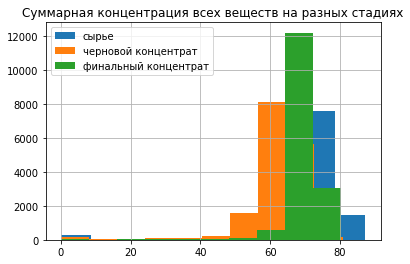

In [67]:
gold_recovery_full['total_rougher.output.concentrate'].hist(label = 'сырье')
gold_recovery_full['total_primary_cleaner.output.concentrate'].hist(label = 'черновой концентрат')
gold_recovery_full['total_final.output.concentrate'].hist(label = 'финальный концентрат')
plt.title('Суммарная концентрация всех веществ на разных стадиях')
plt.legend(loc='upper left')
plt.show()

In [68]:
#for column in gold_recovery_full[['total_rougher.output.concentrate', 'total_primary_cleaner.output.concentrate', 'total_final.output.concentrate']]:
    #gold_recovery_full[column].hist()
    #plt.title(column)
    #plt.show()

Исследуя суммарную концентрацию всех веществ на разных стадиях (в сырье, в черновом и финальном концентратах) заметили аномальные значения в суммарном распределении при значениях меньше 10. Количество тоже примерно постоянно для разных этапов. Возможно, эти это соединения находятся в виде, который прохо поддается процессу воздействия обогащения руды. Кроме того, при распределении большинства в пределах 55-75 этим выбросами со значением до 10 можно пренебречь.

Удалим все строки с сумарной концентрацией веществ меньше 10 из обучающего датасета.

In [69]:
gold_recovery_train['total_rougher.output.concentrate'] = gold_recovery_train['rougher.output.concentrate_ag'] + gold_recovery_train['rougher.output.concentrate_pb'] + gold_recovery_train['rougher.output.concentrate_sol'] + gold_recovery_train['rougher.output.concentrate_au']
gold_recovery_train['total_primary_cleaner.output.concentrate'] = gold_recovery_train['primary_cleaner.output.concentrate_ag'] + gold_recovery_train['primary_cleaner.output.concentrate_pb'] + gold_recovery_train['primary_cleaner.output.concentrate_sol'] + gold_recovery_train['primary_cleaner.output.concentrate_au']
gold_recovery_train['total_final.output.concentrate'] = gold_recovery_train['final.output.concentrate_ag'] + gold_recovery_train['final.output.concentrate_pb'] + gold_recovery_train['final.output.concentrate_sol'] + gold_recovery_train['final.output.concentrate_au']

In [70]:
gold_recovery_train = gold_recovery_train.loc[(gold_recovery_train['total_rougher.output.concentrate'] > 10) & (gold_recovery_train['total_primary_cleaner.output.concentrate'] > 10) & (gold_recovery_train['total_final.output.concentrate'])]

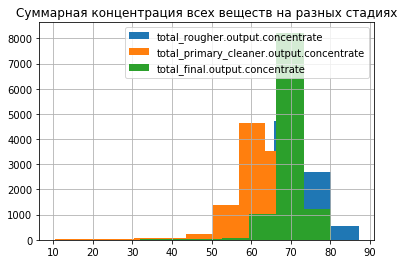

In [71]:
gold_recovery_train['total_rougher.output.concentrate'].hist(label = 'total_rougher.output.concentrate')
gold_recovery_train['total_primary_cleaner.output.concentrate'].hist(label = 'total_primary_cleaner.output.concentrate')
gold_recovery_train['total_final.output.concentrate'].hist(label = 'total_final.output.concentrate')
plt.title('Суммарная концентрация всех веществ на разных стадиях')
plt.legend()
plt.show()

In [72]:
#for column in gold_recovery_train[['total_rougher.output.concentrate', 'total_primary_cleaner.output.concentrate', 'total_final.output.concentrate']]:
    #gold_recovery_train[column].hist()
    #plt.title(column)
    #plt.show()

In [73]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10652 entries, 0 to 16859
Data columns (total 90 columns):
date                                                  10652 non-null datetime64[ns]
final.output.concentrate_ag                           10652 non-null float64
final.output.concentrate_pb                           10652 non-null float64
final.output.concentrate_sol                          10652 non-null float64
final.output.concentrate_au                           10652 non-null float64
final.output.recovery                                 10652 non-null float64
final.output.tail_ag                                  10652 non-null float64
final.output.tail_pb                                  10652 non-null float64
final.output.tail_sol                                 10652 non-null float64
final.output.tail_au                                  10652 non-null float64
primary_cleaner.input.sulfate                         10652 non-null float64
primary_cleaner.input.depressant     

# 3. Модель

In [74]:
features = gold_recovery_train[gold_recovery_test.columns].drop(['date'], axis=1) 

In [75]:
target = gold_recovery_train['final.output.concentrate_au'] # целевой признак для прогноза эффективности для финального продукта 
target_rougher = gold_recovery_train['rougher.output.concentrate_au'] # целевой признак для прогноза эффективности для чернового концентрата

In [76]:
def smape(target, predicted): # функция для подсчета sMAPE (симметричное среднее абсолютное процентное отклонение)
    return (100 * np.sum(2 * np.abs(target - predicted) / (np.abs(target) + np.abs(predicted)))/len(target) )

In [77]:
score = make_scorer(smape, greater_is_better=True) #используем нашу функцию для подсчета оценки

Обучае разные модели и оцениваем их качество кросс-валидацией.

In [78]:
model = LinearRegression()
scores = cross_val_score(model, features, target, cv=3, scoring=score)
scores_rougher = cross_val_score(model, features, target_rougher, cv=3, scoring=score)
print(0.75 * scores.mean() + 0.25 * scores_rougher.mean())

7.548454133900249


In [79]:
for depth in range(1, 10):
    model = DecisionTreeRegressor (random_state=12345, max_depth=depth)
    scores = cross_val_score(model, features, target, cv=3, scoring=score)
    scores_rougher = cross_val_score(model, features, target_rougher, cv=3, scoring=score)
    print('Итоговое sMAPE для:', depth, 0.75 * scores.mean() + 0.25 * scores_rougher.mean()) # подсчет итоговой sMAPE

Итоговое sMAPE для: 1 6.762698490581695
Итоговое sMAPE для: 2 7.275901072144468
Итоговое sMAPE для: 3 7.264584388445469
Итоговое sMAPE для: 4 7.431150168577878
Итоговое sMAPE для: 5 7.451590142275389
Итоговое sMAPE для: 6 7.653595531372269
Итоговое sMAPE для: 7 8.016269139559594
Итоговое sMAPE для: 8 8.554385733581842
Итоговое sMAPE для: 9 9.194976012747425


In [80]:
for estim in range(1, 71, 10):
    model = RandomForestRegressor(n_estimators=estim, random_state=12345)
    scores = cross_val_score(model, features, target, cv=3, scoring=score)
    scores_rougher = cross_val_score(model, features, target_rougher, cv=3, scoring=score)
    print('Итоговое sMAPE для:', estim, 0.75 * scores.mean() + 0.25 * scores_rougher.mean())

Итоговое sMAPE для: 1 17.259817489405403
Итоговое sMAPE для: 11 9.097416925060415
Итоговое sMAPE для: 21 8.808673401923953
Итоговое sMAPE для: 31 9.03784062420738
Итоговое sMAPE для: 41 8.889135426825796
Итоговое sMAPE для: 51 8.811550125831005
Итоговое sMAPE для: 61 8.811565113584932


Оптимальный результат показывает модель решающего леса с максимальной глубиной 1.

In [81]:
new_features = gold_recovery_test.drop(columns=['date'], axis=1) 

Распределение расчетов эффективность обогащения для предсказаний модели


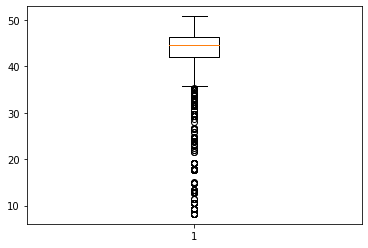

Распределение показателей эффективности обогащения для обучающей выборки


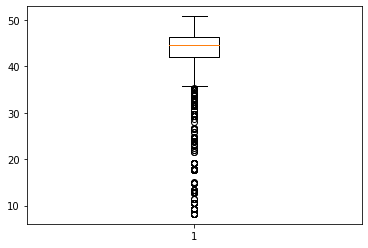

In [82]:
model = DecisionTreeRegressor (random_state=12345)
model.fit(features, target)
predicted = model.predict(new_features)
print('Распределение расчетов эффективность обогащения для предсказаний модели')
plt.boxplot(predicted)
plt.show()
print('Распределение показателей эффективности обогащения для обучающей выборки')
plt.boxplot(predicted)
plt.show()

Распределения показателей эффективности для предсказаний модели на тестовой выборке и на обучающей выглядят одинаково, модель можно назвать адекватной.

# Выводы

В ходе работы были изучены и предобработаны три датасета: обучающая выборка, тестовая выборка и полный/исходный.

Было проверено, что эффективность обогащения рассчитана правильно на обучающей выборке для признака rougher.output.recovery. Было расчитано MAE между вашими расчётами и значением признака - 1.1554903866465914e-14 при медианах 85.23599666059937 и 85.63380780007748.

Определили, что есть параменты, недоступные в тестовой выборке по сравнению с остальными датасетами. Это параметры:

- концентраций на разных стадиях в сырье
- концентрации на разных стадиях в отвальных хвостах
- эффективности на разных стадиях

Причина в том, что данные параметры получаются в процессе обогащения руды (замеряются и/или рассчитываются значительно позже).

Посмотрели, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

Из графиков видим растущее распределение концентрации для золота для каждого последующего этапа очистки:
    - rougher.input.feed_au 5-11
    - rougher.output.concentrate_au 17-23
    - primary_cleaner.output.concentrate_au 27-36
    - final.output.concentrate_au 44-48
Из графиков видим возрастающие значения после флотации, далее уменьшающее на этапах очистки распределение концентрации для серебра:
    - rougher.input.feed_au 6-12
    - rougher.output.concentrate_au 10-15
    - primary_cleaner.output.concentrate_au 6-11.5
    - final.output.concentrate_au 3.5-6.2

Из графиков для свинца видим возрастающие значения распределение концентрации для последующих стадий:
    - rougher.input.feed_au 2-5
    - rougher.output.concentrate_au 5.5-9
    - primary_cleaner.output.concentrate_au 8-12
    - final.output.concentrate_au 9-12
    
Исследуя суммарную концентрацию всех веществ на разных стадиях (в сырье, в черновом и финальном концентратах) заметили аномальные значения в суммарном распределении при значениях меньше 10. Количество тоже примерно постоянно для разных этапов. Возможно, эти это соединения находятся в виде, который прохо поддается процессу воздействия обогащения руды. Кроме того, при распределении большинства в пределах 55-75 этим выбросами со значением до 10 можно пренебречь.

Обучили разные модели и оцените их качество кросс-валидацией. 

Лучшей моделью на основании метрики качества итоговой sMAPE стала модель решающего леса с максимальной глубиной 1. 

При проверке её на тестовой выборке распределения показателей эффективности для предсказаний модели на тестовой выборке и на обучающей выглядят одинаково, значит, модель адекватная.